## Implementing Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style('whitegrid')

### Logistic Regression
We aim to build a logistic regression model that estimates an applicant's probability of admission based on the scores from two exams.

#### Visualizing the data
We start by importing and plotting the given data:

In [2]:
# Load the data. The first two columns contain the exam scores and the third column contains the label.
data = np.loadtxt('data1.txt', delimiter=',')
X, y = data[:,:2], data[:,2]

# View the imported values (first 5 rows)
print(X[:5])
print(y[:5])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
[0. 0. 0. 1. 1.]


In [3]:
# Create plotData function to display the figure where the axes are the two exam scores
def plotData(x, y, xlabel, ylabel, labelPos, labelNeg):
    
    # Separating positive and negative scores (in this case 1 and 0 values):
    pos = (y == 1)
    neg = (y == 0)

    # Scatter plotting the data, filtering them according the pos/neg values
    plt.scatter(x[pos, 0], x[pos, 1], s=30, c='darkblue', marker='+', label=labelPos)
    plt.scatter(x[neg, 0], x[neg, 1], s=30, c='yellow', marker='o', edgecolors='b', label=labelNeg)

    # Labels and limits
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(x[:, 0].min(), x[:, 0].max())
    plt.ylim(x[:, 1].min(), x[:, 1].max())

    # Legend
    pst = plt.legend(loc='upper right', frameon=True)
    pst.get_frame().set_edgecolor('k')

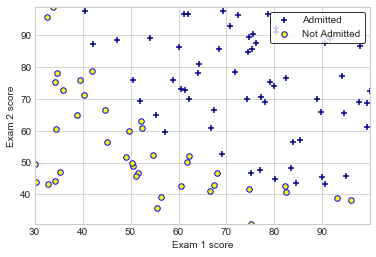

In [4]:
# Plotting the initial figure:
plotData(X, y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')

#### sigmoid function


Logistic regression hypothesis is defined as
$h_\theta(x) = g(\theta^{T}x)$,
where g is the sigmoid function. The sigmoid function is defined as
$
g(z) = \frac{1}{1 +  e^{-z}}
$

In [5]:
# While using (return 1 / (1 + np.exp(-z))), for the sigmoid function, you will get an overflow warning.
# As a solution warning can be ignored, or the dtype can be changed to not cause the error/warning.
# We can use the expit function from scipy to eliminate this issue.
from scipy.special import expit

# Defining sigmoid function:
def sigmoid(z):
    # return 1 / (1 + np.exp(-z))
    return expit(z)

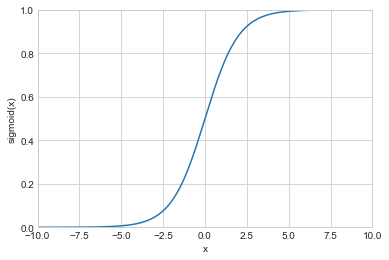

In [6]:
x_val = np.linspace(-10, 10, 10000)

# and plotting the calculated sigmoid function:
plt.plot(x_val, sigmoid(x_val))

# Labels and limits
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.xlim(x_val.min(), x_val.max())
plt.ylim(0, 1);

#### Cost function and gradient

Now we implement __cost function__ and __gradient functions__ for logistic regression.

In [7]:
# Define costFunction function
def costFunction(theta, X, y):
    # Number of training examples
    m = len(y)
    
    # eps = 1e-15 is tolerance for sigmoid function, fixes loss of precision error. 
    # Eliminate errors while using BFGS minimization in calculations using scipy.
    eps = 1e-15
    
    hThetaX = sigmoid(np.dot(X, theta))
    
    J = - (np.dot(y, np.log(hThetaX)) + np.dot((1 - y), np.log(1 - hThetaX + eps))) / m

    return J

In [8]:
# Define gradientFunc:
def gradientFunc(theta, X, y):
    # Number of training examples
    m = len(y)
    
    hThetaX = sigmoid(np.dot(X, theta))
    gradient =  np.dot(X.T, (hThetaX - y)) / m 
    
    return gradient

We add an additional first column to X and set it to all ones. Also, we add theta and initialize the parameters to 0's.

In [9]:
X = np.hstack((np.ones((X.shape[0],1)), X))

theta = np.zeros(X.shape[1])
print(theta)

[0. 0. 0.]


We call __*costFunction*__ and __*gradientFunc*__ functions using the initial parameters of θ.

In [10]:
J = costFunction(theta, X, y)
gradient = gradientFunc(theta, X, y)

print("Cost: %0.3f"%(J))
print("Gradient: {0}".format(gradient))

Cost: 0.693
Gradient: [ -0.1        -12.00921659 -11.26284221]


#### Learning parameters with scipy.optimize using .minimize

[scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) uses __[BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)__ as a default function for the function minimum calculations of unconstrained function, and finds the best parameters for θ (in our case logistic regression cost function). We are feeding objective (cost) function, x0 (initial guess), arguments, and Jacobian (gradient) of objective function to the algorithm.

In [11]:
# Import minimize from scipy:
from scipy.optimize import minimize

# Find the best parameters for θ, using the functions we created earlier:
result = minimize(costFunction, theta, args=(X,y), method='BFGS', jac=gradientFunc, options={'maxiter' : 400, 'disp': True})
result

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 20
         Function evaluations: 27
         Gradient evaluations: 27


      fun: 0.20349770158946895
 hess_inv: array([[ 3.22334551e+03, -2.56933773e+01, -2.62832733e+01],
       [-2.56933773e+01,  2.18825098e-01,  1.96877313e-01],
       [-2.62832733e+01,  1.96877313e-01,  2.29597943e-01]])
      jac: array([1.70083910e-08, 2.07183236e-06, 1.59166614e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 20
     njev: 27
   status: 0
  success: True
        x: array([-25.16133643,   0.20623177,   0.2014716 ])

#### Evaluating logistic regression
After calculating the parameters, we can use the model to predict whether a particular student will be admitted. We are also calculating the decision boundary, and plotting the figure.

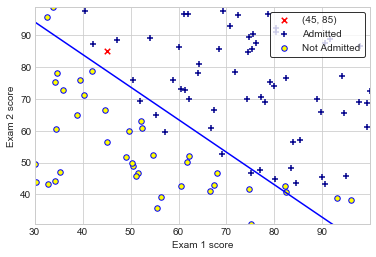

In [12]:
# Assign the calculated θ to a variable
gradBFGS = result['x']

# Calculate x and y for the decision boundary
plot_x = np.array([np.min(X[:, 2])-1, np.max(X[:, 2])+1])

# From the decision boundary calculations x2 = (-1 / θ2) * (θ0 * x1 + θ0)
# the decision line: θ2 * x2 + θ1 * x1 + θ0 = 0
plot_y = (-1 / gradBFGS[2]) * (gradBFGS[1] * plot_x + gradBFGS[0])
plt.scatter(45, 85, s=30, c='r', marker='x', label='(45, 85)')

# Plot the data
plotData(X[:,1:], y, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not Admitted')
plt.plot(plot_x, plot_y, c='b');

In [13]:
# For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect
# to see an admission probability of 0.776
probability = sigmoid(np.dot(gradBFGS, np.array([1, 45.,85.])))

print("Exam scores: 45 and 85")
print("Probability of acceptance: %0.3f"%(probability))

Exam scores: 45 and 85
Probability of acceptance: 0.776


Next step is to calculate the training accuracy of the classifier by computing the percentage of examples it got correct:

In [14]:
def predict(theta, X):
    hThetaX = sigmoid(np.dot(X, theta))
    
    arr = []
    for h in hThetaX:
        if (h > 0.5):
            arr.append(1)
        else:
            arr.append(0)
        
    return np.array(arr)

# Prediction using calculated values of θ and given data set
p = predict(gradBFGS, X)

# Training accuracy
print('Training Accuracy of the classifier: {0}%'.format(np.sum(p==y) / p.size * 100))

Training Accuracy of the classifier: 89.0%


### Implementing Regularized logistic regression

We aim to implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA).

#### Visualizing the data

We start by importing the data and visualizing it, as the previous part.

In [15]:
data = np.loadtxt('data2.txt', delimiter=',')
X, y = data[:,:2], data[:,2]

# View the imported values (first 5 rows)
print(X[:5])
print(y[:5])

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
[1. 1. 1. 1. 1.]


Plotting the imported data:

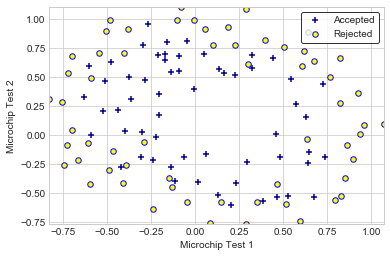

In [16]:
plotData(X, y, 'Microchip Test 1', 'Microchip Test 2', 'Accepted', 'Rejected')

#### Feature mapping

One way to fit the data better is to create more features from each data point. To do that we can use __PolynomialFeatures__ from the __scikit-learn__ library to map the features into all polynomial terms of x1 and x2, up to the sixth power.

In [17]:
# Import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

# Creating the polynomial model
poly = PolynomialFeatures(6)

print(X.shape)
# Transform the data into the sixth power polynomial
X2 = poly.fit_transform(X)
print(X2.shape)

(118, 2)
(118, 28)


#### Cost function and gradient

__Cost function__ and __gradient functions__ for regularized logistic regression.

In [18]:
# Define regularized costFunction function
def costFunctionR(theta, X, y, lam):
    # Number of training examples
    m = len(y)
    eps = 1e-15
    
    hThetaX = sigmoid(np.dot(X, theta))
    
    J = - (np.dot(y, np.log(hThetaX)) + np.dot((1 - y), np.log(1 - hThetaX + eps)) - 
           1/2 * lam * np.sum(np.square(theta[1:]))) / m

    return J

In [19]:
# Define regularized gradientFunc
def gradientFuncR(theta, X, y, lam):
    # Number of training examples
    m = len(y)
    
    hThetaX = sigmoid(np.dot(X, theta))
    
    # We're not regularizing the parameter θ0, replacing it with 0  
    thetaNoZeroReg = np.insert(theta[1:], 0, 0)
    
    gradient =  (np.dot(X.T, (hThetaX - y)) + lam * thetaNoZeroReg) / m 
    
    return gradient

In [20]:
# add theta and initialize the parameters to 0's.
initial_theta = np.zeros(X2.shape[1])
print(initial_theta)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


We call __*costFunctionR*__ and __*gradientFuncR*__ functions using the initial parameters of θ.

In [21]:
J = costFunctionR(initial_theta, X2, y, 1)
gradient = gradientFuncR(initial_theta, X2, y, 1)

print("Cost: %0.3f"%(J))
print("Gradient: {0}".format(gradient))

Cost: 0.693
Gradient: [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


Calculating the parameters with __scipy.optimize__ using __*.minimize__.

In [22]:
result2 = minimize(costFunctionR, initial_theta, args=(X2, y, 1), method='BFGS', jac=gradientFuncR, 
                   options={'maxiter' : 400, 'disp': False})
print(result2['x'])

[ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]


#### Plotting the decision boundary

The decision boundary function is to plot the decision boundary. We can define the data used for meshgrid calculation, and then plot the contour plot using the meshgrid data.

In [23]:
def plotDecisionBoundary(X, y, title):
    # Plot the data
    plotData(X[:, 1:3], y, 'Microchip Test 1', 'Microchip Test 2', 'Accepted', 'Rejected')
    
    # Define the data to use in the meshgrid calculation. Outputting xx and yy ndarrays
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    #rows=len(np.arange(y_min,y_max,0.02)), 
    #xx=[np.arange(x_min, x_max, 0.02)]*rows, yy=[np.arange(y_min, y_max, 0.02)][:,np.newaxis]
    
    Z = sigmoid(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(result2['x']))
    Z = Z.reshape(xx.shape)
    
    # Plot the contour plot
    plt.contour(xx, yy, Z, [0.5], linewidths=1, colors='g')
    plt.title(title)

#### Try Different Regularization Parameters

We get to try different regularization parameters. We are observing overfitting with low λ values. With the larger λ values, we observe the decision boundary not following the data well, thus underfitting the data.

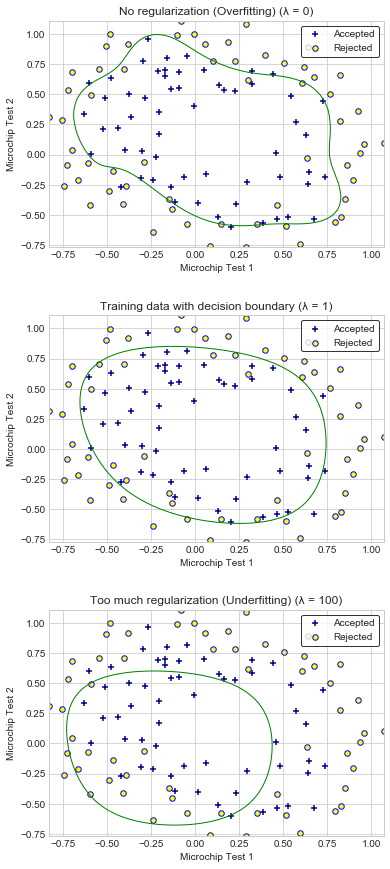

In [24]:
plt.figure(figsize=(6, 15))
plt.subplots_adjust(hspace=0.3)

# Create 3 subplots using 3 different λ values
for i, lam in enumerate([0, 1, 100]):
    result2 = minimize(costFunctionR, initial_theta, args=(X2, y, lam), method='BFGS', jac=gradientFuncR, 
                       options={'maxiter' : 400, 'disp': False})
    
    if (lam == 0):
        title = 'No regularization (Overfitting) (λ = 0)'
    elif (lam == 100):
        title = 'Too much regularization (Underfitting) (λ = 100)'
    else:
        title = 'Training data with decision boundary (λ = 1)'
    
    plt.subplot(3, 1, i+1)
    
    # Plot the decision boundary plot
    plotDecisionBoundary(X2, y, title);